In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from scipy import stats

In [2]:
def SimulatePvals(G, T, L):
    # Simulate log pvalues
    pvals = []    
    n_latent = np.random.binomial(n=G, p=T)
    print(n_latent)
    pvals_latent = np.random.exponential(L, size=n_latent)
    pvals_non_latent = np.random.exponential(1, size=G-n_latent)
    pvals = np.concatenate((pvals_latent, pvals_non_latent))
    #np.random.shuffle(pvals)
    return pvals

In [3]:
def plot_exp(param):
    x = np.linspace(0, 10, 5000)
    y = scipy.stats.expon.pdf(x, scale=1/param)
    plt.plot(x, y)

In [118]:
# data01 = pd.read_csv('/gymreklab-tscc/cynthiawu/gene_correlation_modules_snorlax/test_realdatacorr/numTarget_1000/Beta_1/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')



In [119]:
# data01 = pd.read_csv('/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_1000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')



In [129]:
data01 = pd.read_csv('/gymreklab-tscc/cynthiawu/sim_cpma_test/SD/SampleSize100/numTarget_1000/Beta_05/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')



In [130]:
data01

,SNP,gene,beta,t-stat,p-value,FDR
0,SNP0,Gene334,-1.365368,-13.886617,6.973175e-25,1.045976e-20
1,SNP0,Gene589,-1.744972,-12.875311,8.576040e-23,6.432030e-19
2,SNP0,Gene485,-1.457952,-11.654178,3.273304e-20,1.322532e-16
3,SNP0,Gene898,1.506134,11.639020,3.526751e-20,1.322532e-16
4,SNP0,Gene943,1.482697,11.474605,7.927606e-20,2.378282e-16
...,...,...,...,...,...,...
14995,SNP0,Gene8315,-0.000024,-0.000170,9.998649e-01,9.999268e-01
14996,SNP0,Gene12533,0.000019,0.000136,9.998915e-01,9.999268e-01
14997,SNP0,Gene12139,0.000016,0.000115,9.999085e-01,9.999268e-01
14998,SNP0,Gene5855,-0.000017,-0.000115,9.999088e-01,9.999268e-01


In [131]:
tar = 1000
targene = ['Gene' + str(i) for i in range(tar)]
targene_pvals = data01.loc[data01['gene'].isin(targene)]

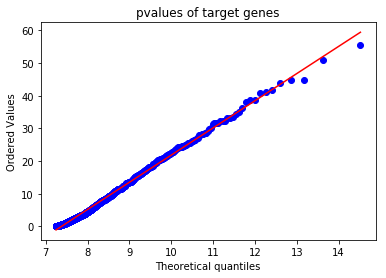

In [132]:
pvalues = -np.log(list(targene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of target genes')

pass

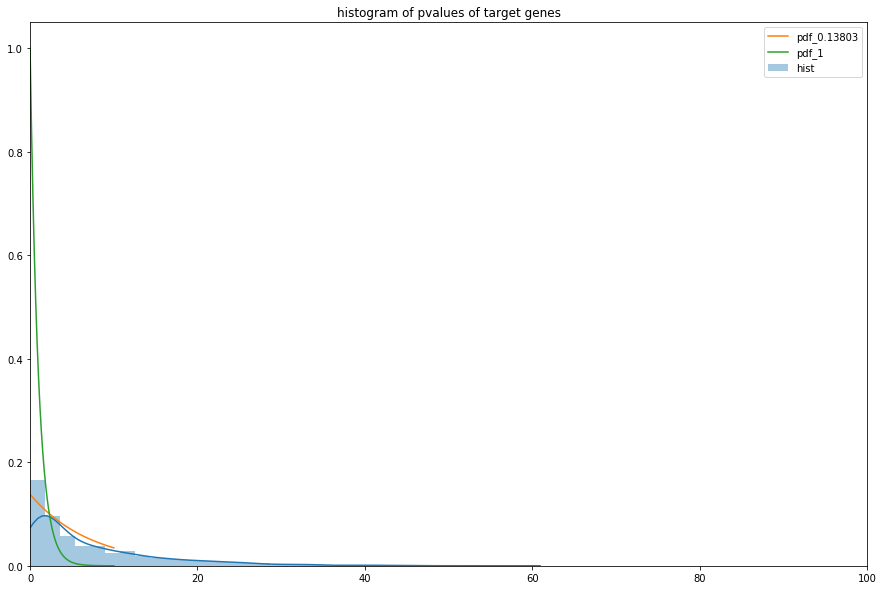

In [133]:
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(targene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 100))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('histogram of pvalues of target genes')

pass

In [134]:
nontargene_pvals = data01.loc[~data01['gene'].isin(targene)]

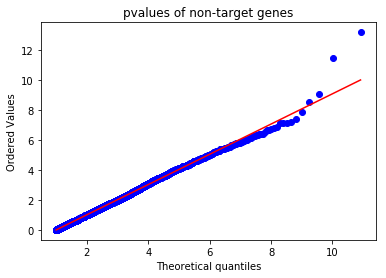

In [135]:
pvalues = -np.log(list(nontargene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(max_lklh), plot=ax)
plt.title('pvalues of non-target genes')
pass

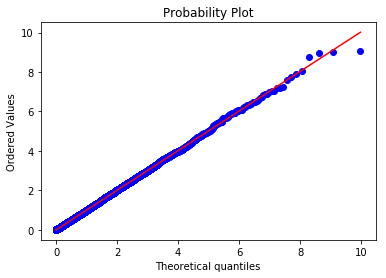

In [136]:
expon_pvals = np.random.exponential(1, size=14900)
# max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(expon_pvals, dist='expon', plot=ax)
pass

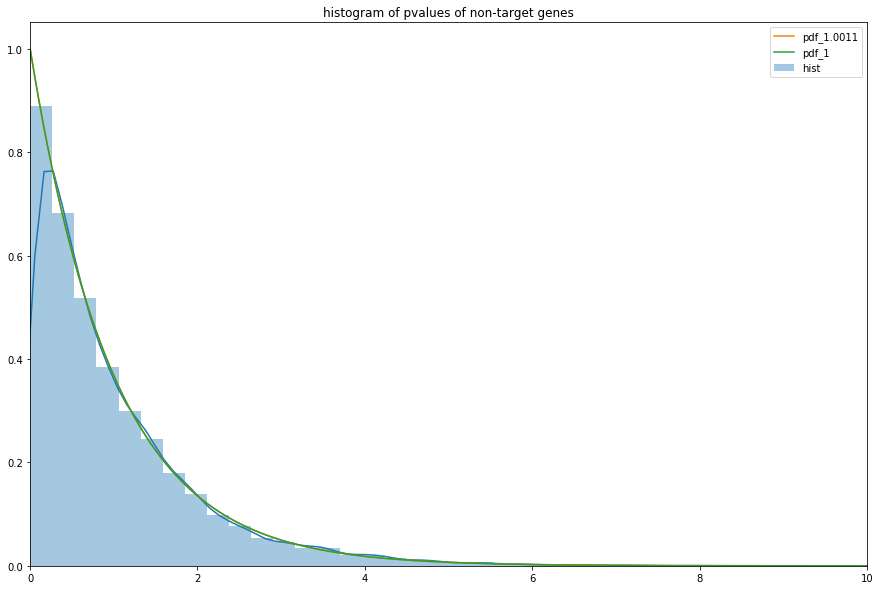

In [137]:
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(nontargene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 10))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('histogram of pvalues of non-target genes')

pass

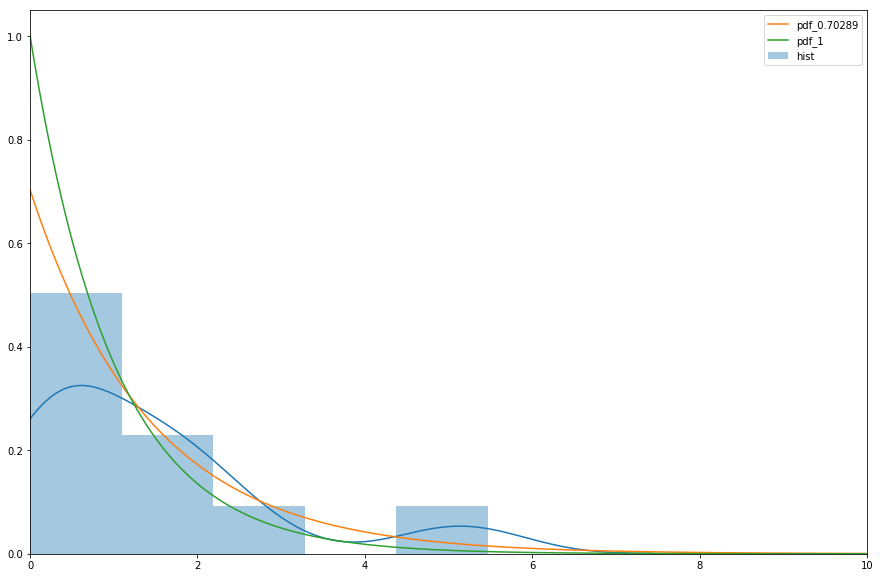

In [18]:
data = pd.read_csv('/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_20/Beta_01/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')
tar = 20
targene = ['Gene' + str(i) for i in range(tar)]
targene_pvals = data.loc[data['gene'].isin(targene)]

plt.figure(figsize=[15, 10])
pvalues = -np.log(list(targene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 10))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
pass

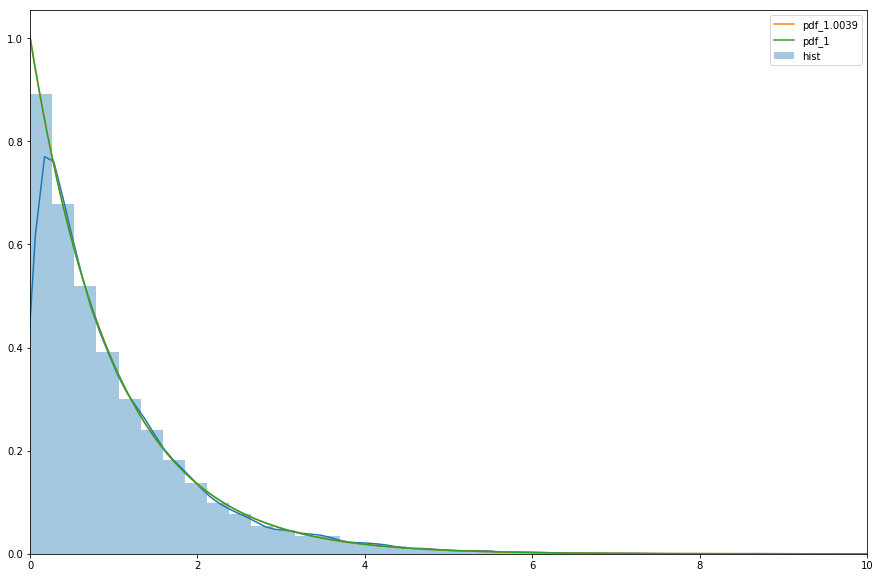

In [19]:
nontargene_pvals = data.loc[~data['gene'].isin(targene)]
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(nontargene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 10))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
pass

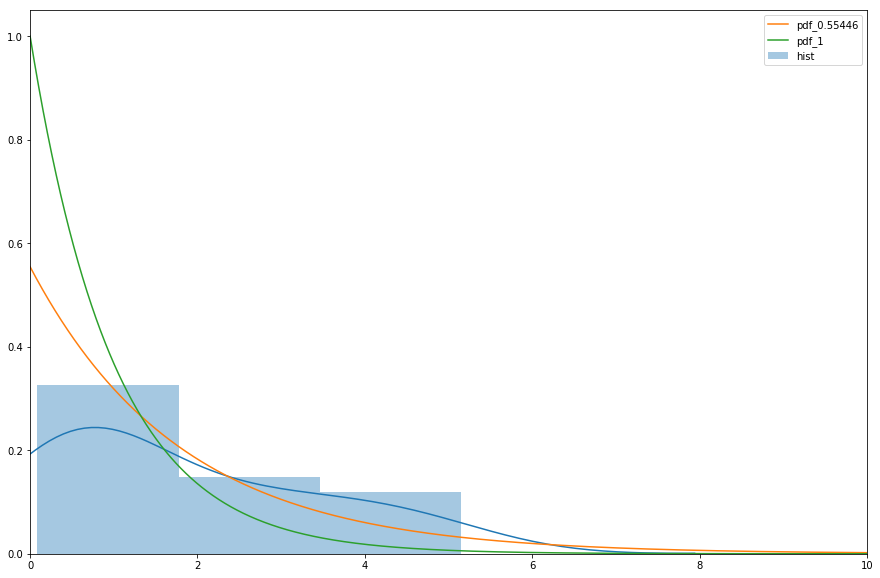

In [25]:
data = SimulatePvals(15000, 0.00133, 1.5)
tar = 20
pvalues = data[:tar]
# targene = ['Gene' + str(i) for i in range(tar)]
# targene_pvals = data.loc[data['gene'].isin(targene)]
# pvalues = targene_pvals

plt.figure(figsize=[15, 10])
#pvalues = -np.log(list(targene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 10))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
pass

89


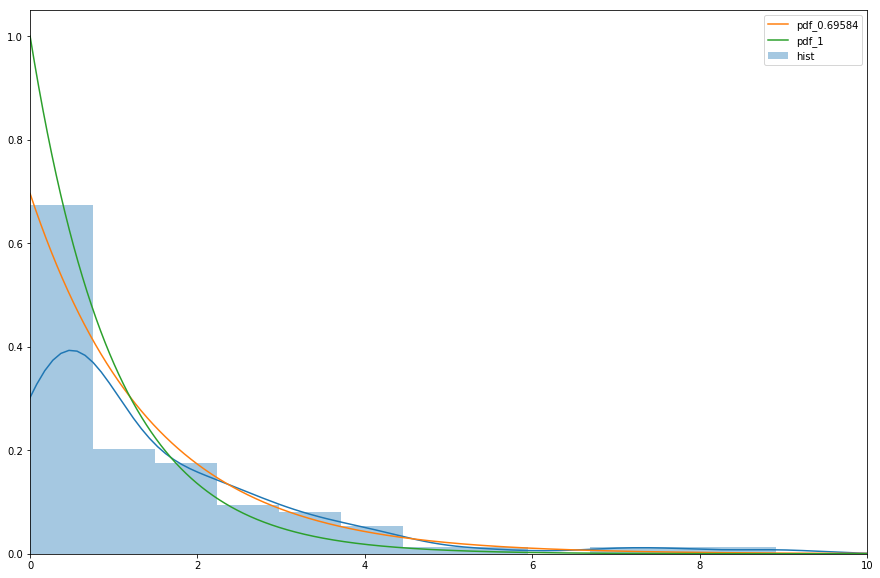

In [28]:
data = SimulatePvals(15000, 0.006666, 1.5)
tar = 100
pvalues = data[:tar]
# targene = ['Gene' + str(i) for i in range(tar)]
# targene_pvals = data.loc[data['gene'].isin(targene)]
# pvalues = targene_pvals

plt.figure(figsize=[15, 10])
#pvalues = -np.log(list(targene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 10))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('')
pass